## Datasets Version
<table>
    <thead>
        <tr>
            <th>Dataset</th>
            <th>Target</th>
            <th>Description</th>
            <th>Use</th>
        <tr>
    </thead>
    <tbody>
        <tr>
            <td>X</td>
            <td>y</td>
            <td>Full dataset minus id, terget and 'Naive Bayes' columns and 1-hot encoded</td>
            <td>Used for analysis in all models</td>
        </tr>
        <tr>
            <td>Xa2</td>
            <td>y</td>
            <td>Same as 'X' but 'Uknown' values are replaced with features mode</td>
            <td>Used for analysis in all models</td>
        </tr>
    </tbody>
</table>

## Gather dependencies

In [1]:
# Import Dependencies
import pandas as pd

## Extract Data

In [2]:
# Read csv files
df = pd.read_csv("../Resources/BankChurners.csv", low_memory=False)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


## Remove Unwnated Colums
'CLIENTNUM' is a unique key assigned to each customer and is not expected to contribute any meaningfull information. 'Attrition_Flag' is the target value and should not be left for the model to train on. Both 'Naive_Bayes_Classifiers' included in the data set are from earlier analysis and should not be included in training new models.

In [3]:
dfr=df.iloc[:,2:21]

## Encode Categorical Features

In [4]:
pd.DataFrame({'column': column, 'dtype': dfr[column].dtype, 'num_unique': len(dfr[column].unique())} for column in dfr.columns)

,column,dtype,num_unique
0,Customer_Age,int64,45
1,Gender,object,2
2,Dependent_count,int64,6
3,Education_Level,object,7
4,Marital_Status,object,4
5,Income_Category,object,6
6,Card_Category,object,4
7,Months_on_book,int64,44
8,Total_Relationship_Count,int64,6
9,Months_Inactive_12_mon,int64,7


In [5]:
dfr = pd.get_dummies(dfr)

In [6]:
X = dfr
y = pd.get_dummies(df["Attrition_Flag"]).iloc[:,1]

## Save Clean Data to CSV

In [7]:
y.to_csv('../Resources/y.csv', index=False)

In [8]:
X.to_csv("../Resources/X.csv", index=False)

In [9]:
unkown_features = ['Education_Level', 'Marital_Status', 'Income_Category']
count_tot = len(X)
print('% of Feature Unknown\n-------------------')
for feature in unkown_features:
    count_unk = len(X.loc[X[feature+'_Unknown']==1,:])
    print(f'{feature}: {round(count_unk/count_tot*100,2)}%')

% of Feature Unknown
-------------------
Education_Level: 15.0%
Marital_Status: 7.4%
Income_Category: 10.98%


a1: Drop all 'Unknown's

In [10]:
dfa1=df
[dfa1[feature]!='Unknown' for feature in unkown_features]

[0         True
 1         True
 2         True
 3         True
 4         True
          ...  
 10122     True
 10123    False
 10124     True
 10125     True
 10126     True
 Name: Education_Level, Length: 10127, dtype: bool,
 0         True
 1         True
 2         True
 3        False
 4         True
          ...  
 10122     True
 10123     True
 10124     True
 10125    False
 10126     True
 Name: Marital_Status, Length: 10127, dtype: bool,
 0        True
 1        True
 2        True
 3        True
 4        True
          ... 
 10122    True
 10123    True
 10124    True
 10125    True
 10126    True
 Name: Income_Category, Length: 10127, dtype: bool]

a2: Use most common value in feature for replacement to 'Unknown' values

In [11]:
print(f'Most common value for each\nfeatures with unknown values\n------------------------------')
dfa2=df
for feature in unkown_features:
    mode = df[feature].mode().values[0]
    dfa2[feature] = dfa2[feature].apply(lambda x: mode if x=='Unknown' else x)
    print(f'{feature}: {mode}')
dfa2=dfa2.iloc[:,2:21]
dfa2=pd.get_dummies(dfa2)

Most common value for each
features with unknown values
------------------------------
Education_Level: Graduate
Marital_Status: Married
Income_Category: Less than $40K


In [12]:
dfa2.to_csv('../Resources/Xa2.csv')

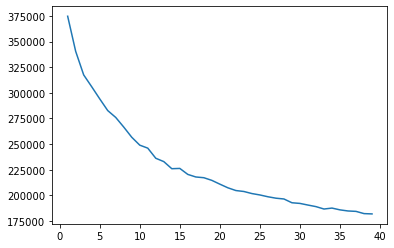

In [13]:
from sklearn.preprocessing import StandardScaler as SS
from sklearn.cluster import KMeans as KM
from matplotlib import pyplot as plt

N = 40
Xs = SS().fit_transform(X)
inertia = [KM(n_clusters=i).fit(Xs).inertia_ for i in range(1, N)]
plt.plot(list(range(1, N)), inertia)

## Explore Features

In [14]:
from mechlearn import get_data_dict
get_data_dict()

[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.46M/6.46M [00:00<00:00, 9.32MB/s]


,Column,Description
0,CLIENTNUM,Client number. Unique identifier for the customer holding the account
1,Attrition_Flag,Internal event (customer activity) variable - if the account is closed then 1 else 0
2,Customer_Age,Demographic variable - Customer's Age in Years
3,Gender,"Demographic variable - M=Male, F=Female"
4,Dependent_count,Demographic variable - Number of dependents
5,Education_Level,"Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)"
6,Marital_Status,"Demographic variable - Married, Single, Divorced, Unknown"
7,Income_Category,"Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, >"
8,Card_Category,"Product Variable - Type of Card (Blue, Silver, Gold, Platinum)"
9,Monthsonbook,Period of relationship with bank
